    Draw Date    Winning Numbers  Multiplier
0  09/26/2020  11 21 27 36 62 24         3.0
1  09/30/2020  14 18 36 49 67 18         2.0
2  10/03/2020  18 31 36 43 47 20         2.0
3  10/07/2020  06 24 30 53 56 19         2.0
4  10/10/2020  05 18 23 40 50 18         3.0
5  10/14/2020  21 37 52 53 58 05         2.0
6  10/17/2020  06 10 31 37 44 23         2.0
7  10/21/2020  01 03 13 44 56 26         3.0
8  10/24/2020  18 20 27 45 65 06         2.0
9  10/28/2020  11 28 37 40 53 13         2.0
DATA CLEANING
Draw Date            0
Winning Numbers      0
Multiplier         210
dtype: int64
Number of rows: 1460
Number of rows after removing missing values (1460-210): 1250
Number of duplicates: 0

Display of the new dataframe after splitting the winning numbers into different columns
 and naming them <num1>..<num6>, the numbers show their positions.
     Draw Date    Winning Numbers  Multiplier num1 num2 num3 num4 num5 num6
0  09/26/2020  11 21 27 36 62 24         3.0   11   21   27   36   62 

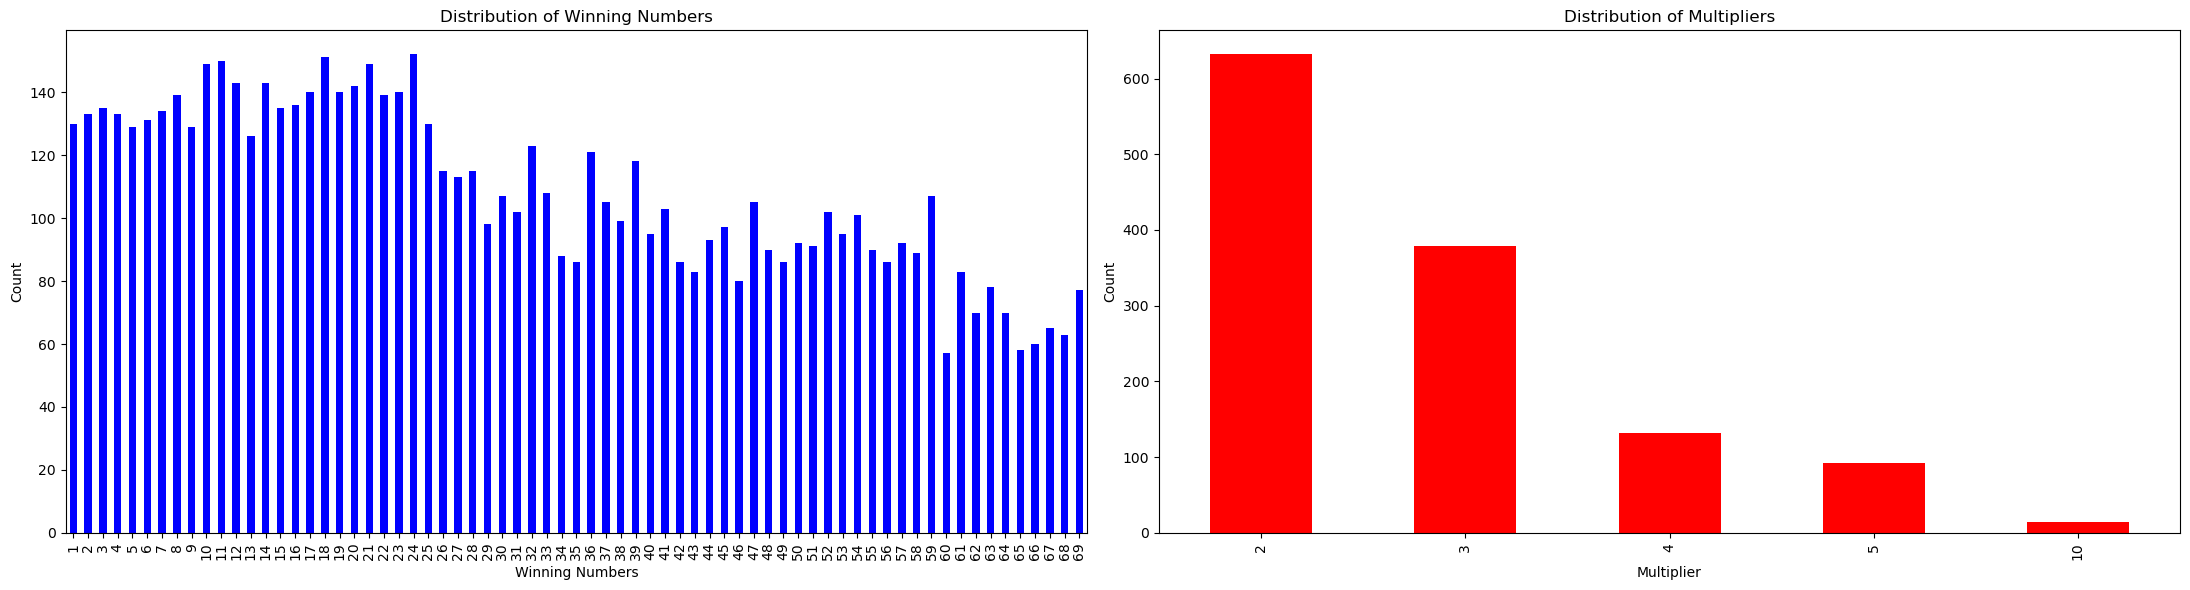

Question 2:  (to be modified) 
Is there any pattern or trend in the winning numbers over the years?


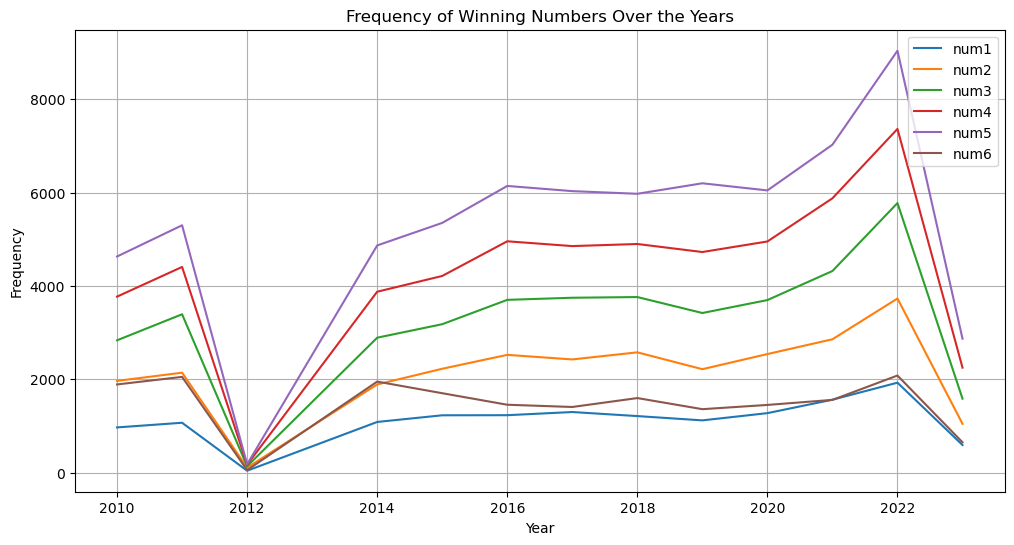

Question 3: Which is the most commonly drawn number? Which is the least commonly drawn number?
Most commonly drawn number: 24
Least commonly drawn number: 60
Question 4 (to be reviewed):
Is there any correlation between the winning numbers and the multiplier? 


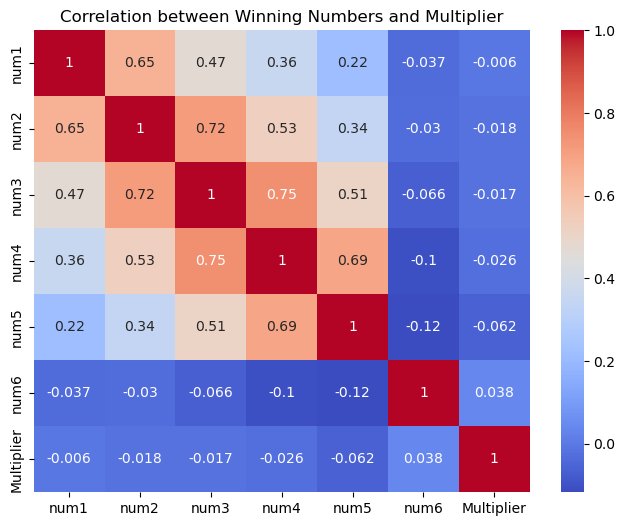

Question 5 (TO BE MODIFIED)
What are the top five most frequently drawn winning numbers for each position (1-5) in the Powerball lottery since 2010?
Top five most frequently drawn numbers for position 1:
1    90
2    85
3    77
5    76
4    69
Name: num1, dtype: int64

Top five most frequently drawn numbers for position 2:
21    48
12    48
15    46
28    46
20    45
Name: num2, dtype: int64

Top five most frequently drawn numbers for position 3:
39    44
37    42
36    40
32    40
34    39
Name: num3, dtype: int64

Top five most frequently drawn numbers for position 4:
45    46
47    44
53    42
46    42
52    42
Name: num4, dtype: int64

Top five most frequently drawn numbers for position 5:
69    77
59    64
67    60
58    59
68    57
Name: num5, dtype: int64

Top five most frequently drawn numbers for position 6:
24    63
18    54
4     49
11    49
25    47
Name: num6, dtype: int64

Question 6: Based on the historical data from the Powerball lottery, 
which series of numbers have t

In [44]:
#!/usr/bin/env python
# coding: utf-8

# In[4]:


import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import numpy as np
import pandas as pd
import seaborn as sn
import seaborn as sns
from termcolor import colored


#importing the dataset from the following website: "https://data.ny.gov/api/views/d6yy-54nr/rows.xml?accessType=DOWNLOAD"
file_path = r"C:\Users\Administrateur\Downloads\Lottery_Powerball_Winning_Numbers__Beginning_2010.csv"
df = pd.read_csv(file_path)

# Display the first 10 rows
print(df.head(10))


# Print the sentence in blue
print(colored("DATA CLEANING", "blue"))


# Check for missing values
missing_values = df.isnull().sum()

# Print the count of missing values
print( missing_values)

# Count the number of rows
num_rows = df.shape[0]

# Print the number of rows
print("Number of rows:", num_rows)

# Create a new cleaned DataFrame without modifying the original DataFrame
new_df = df.dropna().copy()

# Count the number of rows in the cleaned DataFrame
num_rows_cleaned = new_df.shape[0]

# Print the number of rows after removing missing values
print(colored("Number of rows after removing missing values (1460-210):","green"), num_rows_cleaned)

# Check for duplicates
duplicates = new_df.duplicated()

# Count the number of duplicates
num_duplicates = duplicates.sum()

# Print the number of duplicates
print("Number of duplicates:", num_duplicates)




# Split the winning numbers column
new_df[['num1', 'num2', 'num3', 'num4', 'num5', 'num6']] = new_df['Winning Numbers'].str.split(' ', expand=True)

# Display the updated DataFrame
print(colored("\nDisplay of the new dataframe after splitting the winning numbers into different columns\n and naming them <num1>..<num6>, the numbers show their positions.\n","green"),new_df.head(10))





# Check for missing values
missing_values = new_df.isnull().sum()
# Count the number of rows
num_rows = new_df.shape[0]
# Print the number of rows
print("Number of rows:", num_rows)

# Print the count of missing values
print(missing_values)
print(colored("\nNow we know there are no missing numbers amongst the winning numbers columns.\n","green"))

# Check data types of each column
column_types = new_df.dtypes

# Print the data types
print(column_types)

print(colored("Because the data types aren't all correct, we convert the Dates to date type and the winning numbers to integers. \n","green"))
# Convert the first column ('Draw Date') to datetime
new_df['Draw Date'] = pd.to_datetime(new_df['Draw Date'])
# Convert the rest of the columns to integers
columns_to_convert = ['Multiplier', 'num1', 'num2', 'num3', 'num4', 'num5', 'num6']
new_df[columns_to_convert] = new_df[columns_to_convert].astype(int)

# Check data types of each column after conversion
column_types = new_df.dtypes

# Print the updated data types
print(column_types)

print(colored("\nThe column types are now correct.\n"))




print(colored("DATA VISUALISATION + ANALYSIS + INTERPRETATION","blue"))
print(colored("Question 1: What is the distribution of winning numbers and multipliers?","red"))
print("The distribution of the winning numbers and the multipliers: \n")
# Compute the distribution of winning numbers
winning_numbers_counts = new_df[num_columns].stack().value_counts().sort_index()
# Plotting the distributions
plt.figure(figsize=(22, 6))

# Distribution of winning numbers
plt.subplot(1, 2, 1)
winning_numbers_counts.plot(kind='bar', color='blue')
plt.title("Distribution of Winning Numbers")
plt.xlabel("Winning Numbers")
plt.ylabel("Count")

# Compute the distribution of multipliers
multiplier_counts = new_df['Multiplier'].value_counts().sort_index()
# Distribution of multipliers
plt.subplot(1, 2, 2)
multiplier_counts.plot(kind='bar', color='red')
plt.title("Distribution of Multipliers")
plt.xlabel("Multiplier")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

#Question 2 (to be modified)
print(colored("Question 2:  (to be modified) \nIs there any pattern or trend in the winning numbers over the years?","red"))
# Convert the 'Draw Date' column to datetime
new_df['Draw Date'] = pd.to_datetime(new_df['Draw Date'])
# Extract the year from the 'Draw Date' column
new_df['Year'] = new_df['Draw Date'].dt.year
# Split the winning numbers column
new_df[['num1', 'num2', 'num3', 'num4', 'num5', 'num6']] = new_df['Winning Numbers'].str.split(' ', expand=True)
# Convert the 'num1' to 'num6' columns to integers
num_columns = ['num1', 'num2', 'num3', 'num4', 'num5', 'num6']
new_df[num_columns] = new_df[num_columns].astype(int)
# Compute the frequency of winning numbers by year
winning_numbers_freq = new_df.groupby('Year')[num_columns].sum()
# Plotting the frequency of winning numbers over the years
plt.figure(figsize=(12, 6))
for number in num_columns:
    plt.plot(winning_numbers_freq.index, winning_numbers_freq[number], label=number)

plt.title("Frequency of Winning Numbers Over the Years")
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


# Question 3
print(colored("Question 3: Which is the most commonly drawn number? Which is the least commonly drawn number?","red"))
# Split the winning numbers column
new_df[['num1', 'num2', 'num3', 'num4', 'num5', 'num6']] = new_df['Winning Numbers'].str.split(' ', expand=True)

# Concatenate all the winning numbers into a single column
all_numbers = pd.concat([new_df['num1'], new_df['num2'], new_df['num3'], new_df['num4'], new_df['num5'], new_df['num6']], ignore_index=True)

# Calculate the frequency of each number
number_counts = all_numbers.value_counts().sort_values(ascending=False)

# Get the most commonly drawn number
most_common_number = number_counts.index[0]

# Get the least commonly drawn number
least_common_number = number_counts.index[-1]

# Print the results
print("Most commonly drawn number:", most_common_number)
print("Least commonly drawn number:", least_common_number)

#Question 4 (to be reviewed)
print(colored("Question 4 (to be reviewed):\nIs there any correlation between the winning numbers and the multiplier? ","red"))

# Split the winning numbers column
new_df[['num1', 'num2', 'num3', 'num4', 'num5', 'num6']] = new_df['Winning Numbers'].str.split(' ', expand=True)

# Convert the 'num1' to 'num6' columns to integers
num_columns = ['num1', 'num2', 'num3', 'num4', 'num5', 'num6']
new_df[num_columns] = new_df[num_columns].astype(int)

# Calculate the correlation matrix
correlation_matrix = new_df[num_columns + ['Multiplier']].corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation between Winning Numbers and Multiplier")
plt.show()

#Question 5 (TO BE MODIFIED)
print(colored("Question 5 (TO BE MODIFIED)\nWhat are the top five most frequently drawn winning numbers for each position (1-5) in the Powerball lottery since 2010?","red"))

# Split the winning numbers column
new_df[['num1', 'num2', 'num3', 'num4', 'num5', 'num6']] = new_df['Winning Numbers'].str.split(' ', expand=True)

# Convert the 'num1' to 'num6' columns to integers
num_columns = ['num1', 'num2', 'num3', 'num4', 'num5', 'num6']
new_df[num_columns] = new_df[num_columns].astype(int)

# Calculate the frequency of each number for each position
frequency_by_position = {}
for i, col in enumerate(num_columns, start=1):
    frequency_by_position[col] = new_df[col].value_counts().sort_values(ascending=False)

# Print the top five most frequently drawn winning numbers for each position
for i, col in enumerate(num_columns, start=1):
    print(f"Top five most frequently drawn numbers for position {i}:")
    print(frequency_by_position[col].head(5))
    print()

#Question 6
print(colored("Question 6: Based on the historical data from the Powerball lottery, \nwhich series of numbers have the highest probability of appearing in the winning combination?","red"))
# In[38]:




# Split the winning numbers column
new_df[['num1', 'num2', 'num3', 'num4', 'num5', 'num6']] = new_df['Winning Numbers'].str.split(' ', expand=True)

# Concatenate all the winning numbers into a single series
all_numbers = pd.concat([new_df['num1'], new_df['num2'], new_df['num3'], new_df['num4'], new_df['num5'], new_df['num6']], ignore_index=True)

# Calculate the frequency of each series of numbers
series_counts = all_numbers.groupby(all_numbers.index // 5).apply(tuple).value_counts().sort_values(ascending=False)

# Get the series with the highest probability
highest_probability_series = series_counts.index[0]

# Print the series with the highest probability
print("Series of numbers with the highest probability of appearing in the winning combination:", highest_probability_series)




#Question 7
print(colored("Question 7: Based on the historical data from the Powerball lottery, \nwhich series of numbers have the highest probability of appearing in the winning combination?","red"))
def calculate_probability_of_winning(tries, odds):
    probability_of_not_winning = (1 - (1 / odds)) ** tries
    probability_of_winning = 1 - probability_of_not_winning
    return probability_of_winning

number_of_tries = 1
odds_of_winning = 1000000

probability = calculate_probability_of_winning(number_of_tries, odds_of_winning)
print(f"The estimated probability of winning from the first try is: {probability * 100:.6f}%")


number_of_tries = 1000000
odds_of_winning = 1000000

probability = calculate_probability_of_winning(number_of_tries, odds_of_winning)
print(f"The estimated probability of winning after {number_of_tries} (1 million )tries is: {probability * 100:.6f}%")

number_of_tries02 = 10000000
odds_of_winning = 1000000

probability02 = calculate_probability_of_winning(number_of_tries02, odds_of_winning)
print(f"The estimated probability of winning after {number_of_tries02} (TEN MILLION) tries is: {probability02 * 100:.6f}%")


# In[40]:


#The odds of winning the Powerball lottery depend on the specific rules and parameters of the game, including the number of balls drawn and the range of possible numbers. As an AI language model, I don't have real-time access to the latest Powerball odds. However, I can provide you with some general information.

#Typically, in Powerball, players select five numbers from a set range (e.g., 1-69) for the white balls and one additional number (the Powerball) from a separate range (e.g., 1-26). The odds of matching all five white balls and the Powerball to win the jackpot prize are quite low, usually in the millions or tens of millions to one.

#To calculate the exact odds of winning, you would need to know the specific rules and number ranges used in the Powerball game you are referring to. You can check the official Powerball website or consult the lottery regulations in your country or region for the most accurate and up-to-date odds.

#As for how many tries it would take to win with random numbers, winning the lottery is a game of chance, and each draw is an independent event. The number of tries required to win can vary significantly. It's possible to win on the first attempt, but it's also possible to play for a long time without winning. Remember that the outcome of each draw is random and not influenced by previous results.

#If you're interested in estimating the likelihood of winning after a certain number of tries, you can calculate the probability of winning based on the odds and the number of attempts. For example, if the odds of winning are 1 in 100 million, the probability of winning on any single try would be 1 divided by 100 million. You can then calculate the probability of not winning after a certain number of tries by raising the probability of not winning on each try to the power of the number of attempts. Subtracting this result from 1 will give you an estimate of the likelihood of winning after a specific number of tries.

#Keep in mind that playing the lottery should be done responsibly and for entertainment purposes. The odds of winning are typically quite low, and it's important to only spend what you can afford to lose.


# In[ ]:




